In [1]:
#run this cell as-is

import pandas as pd
import numpy as np

from sklearn.datasets import make_classification

from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate


from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import f1_score

import matplotlib.pyplot as plt
%matplotlib inline

#used for tests
from test_scripts.test_class import Test
test = Test()

data = test.load_ind('data')

X = data.drop('target', axis=1, inplace=False)
y = data['target']

### Complete the following code which:

- Performs a train-test split
  - test data is 20% of total data, `random_state` of 34

- creates StandardScaler, KnnClassifier and DecisionTreeClassifier objects

- scales the train and test data (correctly!)

- Sets up a loop which
  - sets the `n_neighbors` attribute in the knn object to the current iteration of the loop
     - (Why do we only include odd k values?  Why do we start with 3?)
  - fits the knn object on the training data
  - makes predictions on the test data
  - finds the f1_score of the test data
  - appends that score to `knn_scores`, a hither-to empty list
  
The code following the loop graphs the f1_score by k value, no need to alter anything in there

Graph should look like this:

![](test_obj/viz.png)

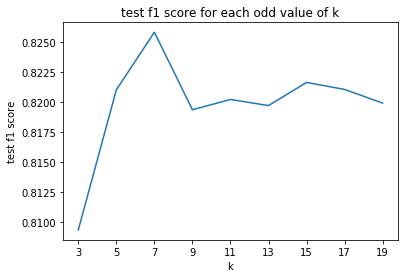

In [6]:
#complete the following code

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=34, train_size=.2)

scaler = StandardScaler()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()

X_train_scl = scaler.fit_transform(X_train)

X_test_scl = scaler.transform(X_test)

knn_scores = []

for k in range(3,20,2):

    knn = knn.set_params(n_neighbors=k)
    
    knn.fit(X_train, y_train)
    knn_preds = knn.predict(X_test)
    
    knn_score = f1_score(y_test, knn_preds)
    
    knn_scores.append(knn_score)
fig, ax = plt.subplots()
ax.plot([x for x in range(3,20,2)], knn_scores)
ax.set_xticks([x for x in range(3,20, 2)])
ax.set_xlabel('k')
ax.set_ylabel('test f1 score')
ax.set_title('test f1 score for each odd value of k')
plt.plot();

### Which value of k should we choose as our model?

In [ ]:
'''
Your answer here
'''

### Next, fill in the following code to get a test f1 score for a decision tree

- Fit the data to the decision tree object you made above
  - remember to include the right X and y!
  
  
- create predictions (of the right X!)

- generate f1_score for test data (using the right objects!)

In [ ]:
#fill in your code below

dt.fit(######)
dt_preds = #######

dt_score = f1_score(#######)

In [18]:
#run this cell to test!

test.run_test(dt_score, '1_dt_score')

### But that's just with a simple train/test split, right?
#### How do we now what we're seeing isn't just due to the specific split we made?

Let's use `cross_val_score` to cross-validate.  

That way, we can get averages to our metrics and provide some assurance
we're not seeing things due to random cuts of splits.

The code below looks like the code above, except
- fill in `cross_val_score` instead of fitting knn or dt objects
  - look at the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) and figure out what parameters/arguments you need to include to generate an f1 score from 10-fold cross-validation
    
  - don't worry about randomness meaning you won't match the examples, 
  that's taken care of by `np.random.seed` at the top of the cell
  
- again look at the documentation to figure out what object you need to mean to get an "average" f1 score from the 10-fold cv process

Your knn curve should look like the graph below, and you can test your dt score below

![](test_obj/viz2.png)


In [ ]:
#fill in your code below

np.random.seed(34)

scaler = #####
knn = #####()
dt = #####()

knn_cv_scores = [] 

for k in range(3,20,2):
    knn = knn.set_params(#####)
    
    f1_scores_cv = cross_val_score(#####)
    
    f1_score_mean = #####
    
    knn_cv_scores.append(#####)
    
fig, ax = plt.subplots()
ax.plot([x for x in range(3,20, 2)], knn_cv_scores)
ax.set_xticks([x for x in range(3,20, 2)])
ax.set_xlabel('k')
ax.set_ylabel('10-fold cv f1 avg')
ax.set_title('knn 10-fold cv f1 score for odd values of k')
plt.plot();   

dt_cv_scores = cross_val_score(#####)
dt_cv_mean = #####

In [38]:
#run this to test your 10-fold cv dt mean

test.run_test(dt_cv_mean, 'dt_cv_mean')

### What do you notice about the knn curve?  About the dt f1 score?  Why did this happen?

In [ ]:
'''
Your answer here
'''

### ok you wanna compare training and test metrics?

![](viz/kramer.gif)

### let's compare training and test metrics

This will run similarly as above, except now we use `cross_validate` in order to get both train and test metrics

- check the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html) to see what parameters and arguments to include to generate an f1 score on 10-fold cross-validation while returning both training and testing error for each fold

- check the documentation to figure out how to extract the training scores and testing scores in order to mean them

- check the documentation again just for fun

- get used to checking documentation

- train/test graph for knn should look like this

![](viz/viz3.png)

In [ ]:
#fill in your code below

np.random.seed(34)

knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()

knn_cv_test_scores = [] 
knn_cv_train_scores = []

for k in range(3,20,2):
    knn = knn.#####
    
    f1_scores_cv = cross_validate(#####)
    
    f1_train_score_mean = #####
    f1_test_score_mean = #####
    
    knn_cv_train_scores.append(#####)
    knn_cv_test_scores.append(#####)
    
fig, ax = plt.subplots()
ax.plot([x for x in range(3,20, 2)], knn_cv_train_scores, label='train')
ax.plot([x for x in range(3,20, 2)], knn_cv_test_scores, label='test')
ax.set_xticks([x for x in range(3,20, 2)])
ax.set_xlabel('k')
ax.legend()
ax.set_ylabel('knn f1 score crossval avg')
        
plt.plot();   


dt_cv_scores = cross_validate(#####)

dt_cv_train_mean = #####
dt_cv_test_mean = #####
    
print(f'dt cv train mean f1 score: {#####}')
print(f'dt cv test mean f1 score: {#####}')

In [ ]:
#test yer dt train/test means below

test.run_test(dt_cv_train_mean, 'dt_cv_train_mean')
test.run_test(dt_cv_test_mean, 'dt_cv_test_mean')

### What k should we choose for knn?  Is knn over-fitting or under-fitting?  
How do you know?

### Is the decision tree over-fitting or under-fitting?

Figure out whether you need to make the decision tree more or less complex

Figure out what hyperparameters you would change, and how, to implement your decision

**BONUS**

Play around with the hyperparameters in order to make it do so

Best train and test error (if you can explain why it's the best) gets a treat

In [ ]:
'''
What k should we choose?



Is knn over- or under-fitting?




Is the decision tree over-fitting or under-fitting?




Should we make the tree more or less complex?



What hyperparams would you change, and how, to implement the above?

'''

#BONUS playing around w/ dt hyperparams



#play here!